# **This Code is created to run on VS code**
*Add Flowers data folder in the same directory of this program*

Update Data set directory if you want to run in google collab

TEAM ID : PNT2022TMID51231

In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('../flowers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../flowers\daisy\100080576_f52e8ee070_n.jpg
../flowers\daisy\10140303196_b88d3d6cec.jpg
../flowers\daisy\10172379554_b296050f82_n.jpg
../flowers\daisy\10172567486_2748826a8b.jpg
../flowers\daisy\10172636503_21bededa75_n.jpg
../flowers\daisy\102841525_bd6628ae3c.jpg
../flowers\daisy\10300722094_28fa978807_n.jpg
../flowers\daisy\1031799732_e7f4008c03.jpg
../flowers\daisy\10391248763_1d16681106_n.jpg
../flowers\daisy\10437754174_22ec990b77_m.jpg
../flowers\daisy\10437770546_8bb6f7bdd3_m.jpg
../flowers\daisy\10437929963_bc13eebe0c.jpg
../flowers\daisy\10466290366_cc72e33532.jpg
../flowers\daisy\10466558316_a7198b87e2.jpg
../flowers\daisy\10555749515_13a12a026e.jpg
../flowers\daisy\10555815624_dc211569b0.jpg
../flowers\daisy\10555826524_423eb8bf71_n.jpg
../flowers\daisy\10559679065_50d2b16f6d.jpg
../flowers\daisy\105806915_a9c13e2106_n.jpg
../flowers\daisy\10712722853_5632165b04.jpg
../flowers\daisy\107592979_aaa9cdfe78_m.jpg
../flowers\daisy\10770585085_4742b9dac3_n.jpg
../flowers\daisy\10

# Importing dataset

In [ ]:
print(os.listdir('../flowers'))


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


# Importing libraries

In [ ]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt

In [ ]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128
folder_dir = '../flowers'
for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith(".jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [ ]:
data_arr = np.array(data)
label_arr = np.array(label)

In [ ]:
len(label)

4317

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

# Splitting dataset for modelling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

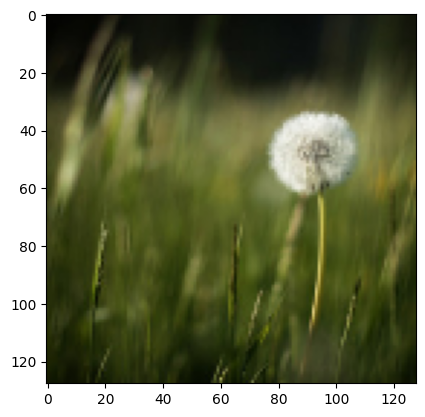

In [ ]:
import matplotlib.pyplot as plt
img = plt.imshow(X_train[0])

In [ ]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=25
epochs=30

c:\Users\prakash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Fitting the model

In [ ]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),epochs = epochs,validation_data = (X_test,y_test),verbose = 1,)

C:\Users\prakash\AppData\Local\Temp\ipykernel_22912\455112825.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),epochs = epochs,validation_data = (X_test,y_test),verbose = 1,)


Epoch 1/30
 60/139 [===========>..................] - ETA: 2:16 - loss: 1.5775 - accuracy: 0.2673

In [ ]:
 # Loss
plt.plot(history.history['loss'], "r")
plt.plot(history.history['val_loss'], "b")
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], "r")
plt.plot(history.history['val_accuracy'],"b")
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(3,3, figsize=(25, 40))
folder_dir = '../flowers'

for i in range(3):
    for j in range(3):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [ ]:
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

## CORRECTLY CLASSIFIED FLOWER IMAGES

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(encoder.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Watch : "+str(encoder.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1
        

## MISCLASSIFIED IMAGES OF FLOWERS

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[mis_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(encoder.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(encoder.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1